In [1]:
import numpy as np
import matplotlib.pyplot as plt

Read in an image of a domino with plt.imread()

In [2]:
im_c = plt.imread("test set 1/bottom_a49.jpg")

Show that it has successfully read.

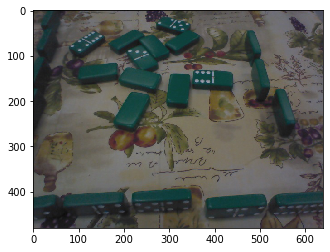

In [3]:
plt.imshow(im_c)

Convert the image to grayscale and create histogram.

<BarContainer object of 100 artists>

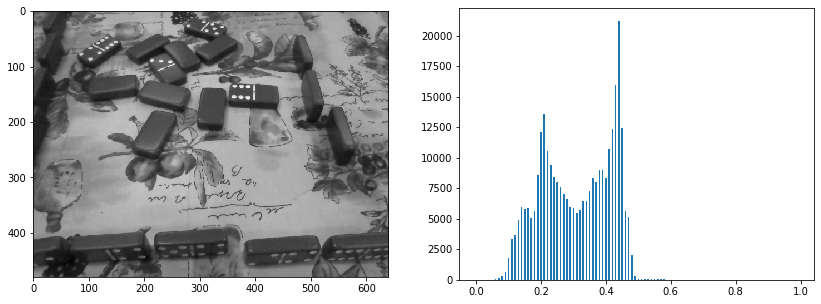

In [4]:
from skimage import color

im_g = color.rgb2gray(im_c)

hist, bins = np.histogram(im_g,bins=np.linspace(0,1,101))

fig, ax = plt.subplots(ncols=2,figsize=(14,5))

ax[0].imshow(im_g, cmap='gray')
ax[1].bar(bins[:-1],hist,width=0.005)

This histogram shows me that there are barely any high intensity pixels. I might want to fix that with equalize_hist.

<BarContainer object of 100 artists>

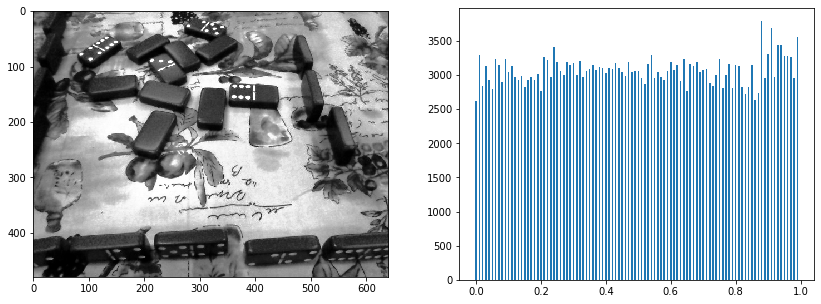

In [5]:
from skimage import exposure

im_eq = exposure.equalize_hist(im_g)

hist, bins = np.histogram(im_eq,bins=np.linspace(0,1,101))

fig, ax = plt.subplots(ncols=2,figsize=(14,5))
ax[0].imshow(im_eq, cmap='gray')
ax[1].bar(bins[:-1],hist,width=0.005)

I'll test if this image is easier to detect afterwards.

Test background subtraction from L4.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


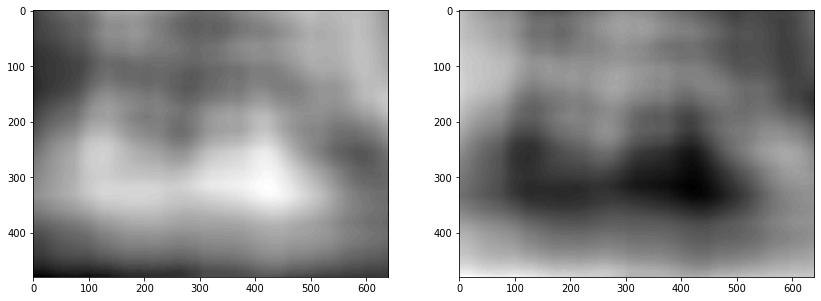

In [6]:
import skimage.filters as flt
from skimage.morphology import square

def custom_uint(im):
    
    imin = np.min(im)
    imax = np.max(im)
    full = imax - imin
    new = np.round(255*(im - imin)/full, 0)
    return new.astype(int)

im_bg = flt.rank.mean(im_g,square(150))
im_sub = custom_uint(im_g-1*im_bg)

fig, ax = plt.subplots(ncols=2,figsize=(14,5))
ax[0].imshow(im_bg, cmap='gray')
ax[1].imshow(im_sub, cmap='gray')

This didn't help at all.

Try edge detection from the feature module.

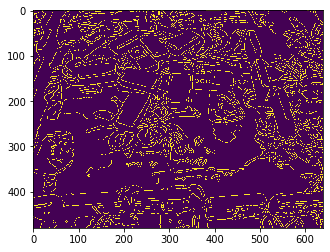

In [7]:
from skimage.feature import canny

edges = canny(im_eq,sigma=1.5)
plt.imshow(edges)

Only 4 dots were correctly detected and most of the background as well.

Try a different filter.

In [8]:
thresh = flt.threshold_otsu(im_eq)
thresh

0.5019596099853516

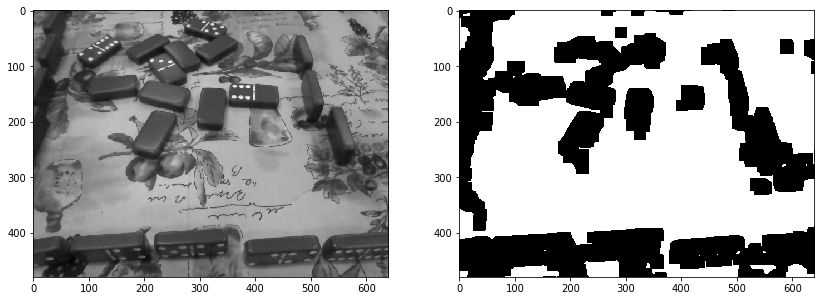

In [9]:
from skimage.morphology import closing

bw = closing(im_eq>thresh, square(20))
bw
fig, ax = plt.subplots(ncols=2,figsize=(14,5))
ax[0].imshow(im_g, cmap='gray')
ax[1].imshow(bw, cmap='gray')

Might be able to detect dominoes with this.

I'm thinking the dots are too small compared to the larger objects.

Let's try template matching.

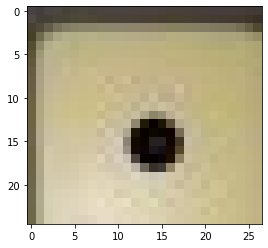

In [10]:
dot = plt.imread("template matching/singledot.jpg")
plt.imshow(dot)

In [11]:
dot.shape

(25, 27, 3)

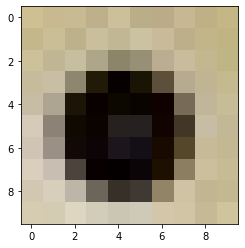

In [12]:
just_the_dot = dot[10:20,10:20]
plt.imshow(just_the_dot)

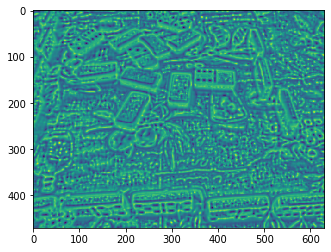

In [13]:
from skimage.feature import match_template

dot = color.rgb2gray(just_the_dot)
result = match_template(im_g,dot)
plt.imshow(result)

How about subtracting the background we got from the otsu_threshold and then template match?

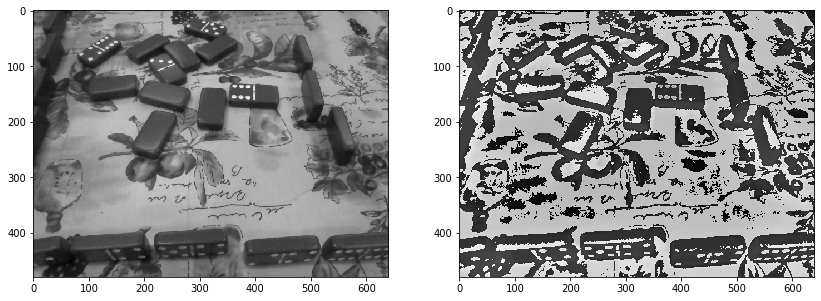

In [15]:
thresh_l = flt.threshold_local(im_g,69)
local = im_g>thresh_l
im_local = local-im_g

fig, ax = plt.subplots(ncols=2,figsize=(14,5))
ax[0].imshow(im_g, cmap='gray')
ax[1].imshow(im_local, cmap='gray')